<a href="https://colab.research.google.com/github/harishmuh/Deep-Learning_study/blob/main/Brain_Tumor_Binary_classification_CNN_with_TF_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain Tumor - Binary Classification**

We will predict whether people have brain tumor based on their MRI image.

In [3]:
# Importing required libraries
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import matplotlib.pyplot as plt

import cv2
import warnings
warnings.filterwarnings('ignore')
import io
from google.colab import files

## **Importing data**

In [4]:
# Function to load image data
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
      img = Image.open(os.path.join(directory, filename))
      img = img.resize((224, 224)) # image size
      img = img.convert('RGB') # image color
      img = np.array(img) / 255.0 # normalization
      images.append(img)
    return images

In [5]:
# Importing image data

# Settings credentials
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
tumor_images = load_images('/content/drive/MyDrive/Colab Notebooks/datasets/brain_tumor_dataset/yes')
no_tumor_images = load_images('/content/drive/MyDrive/Colab Notebooks/datasets/brain_tumor_dataset/no')

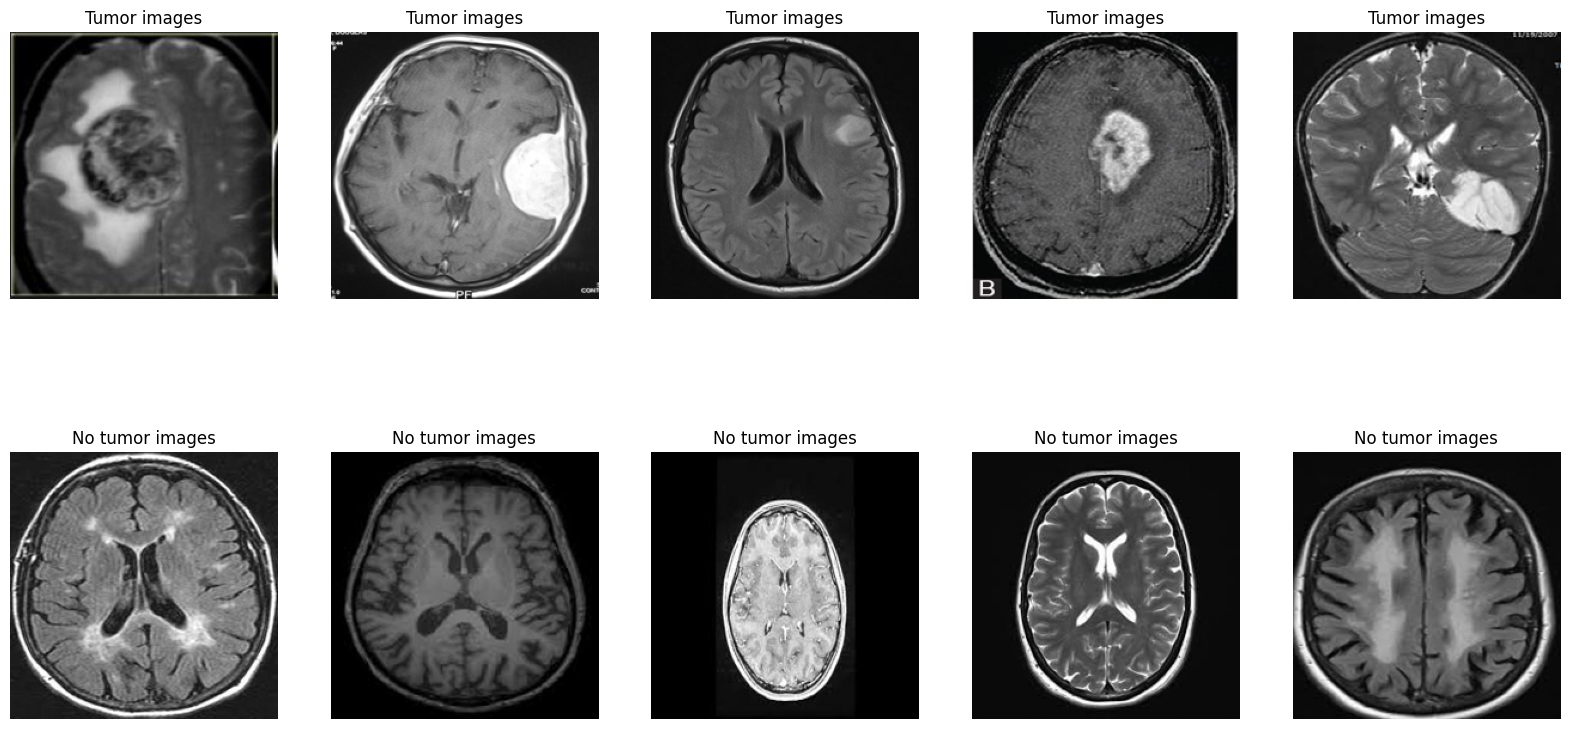

In [8]:
# Displaying some images
fig, axes = plt.subplots(2,5, figsize=(20,10))

# 5 tumor images
for i in range(5):
  axes[0,i].imshow(tumor_images[i])
  axes[0,i].set_title('Tumor images')
  axes[0,i].axis('off')

# 5 non-tumor images
for i in range(5):
  axes[1,i].imshow(no_tumor_images[i])
  axes[1,i].set_title('No tumor images')
  axes[1,i].axis('off')
plt.show()

In [9]:
# Checking data type
type(tumor_images)

list

In [12]:
# Data length
print('Data length (tumor images):',len(tumor_images))
print('Data length (non tumor images):',len(no_tumor_images))

Data length (tumor images): 155
Data length (non tumor images): 98


## **Labelling**

We are having interest to the brain image with tumor, so we will label
* 0 : Non tumor images
* 1 : tumor images


In [13]:
# Creating Assigning label function
def assign_labels(tumor_images, no_tumor_images):
  tumor_labels = np.ones(len(tumor_images)) # Tumor images will be labelled as 1
  no_tumor_labels = np.zeros(len(no_tumor_images)) # No Tumor images will be labelled as 0
  return tumor_labels, no_tumor_labels
tumor_labels, no_tumor_labels = assign_labels(tumor_images, no_tumor_images)

In [14]:
tumor_labels # It contains array

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [15]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

We will put both of tumor images and non-tumor images into new variable

In [16]:
# We will define data and labels
data = tumor_images + no_tumor_images
labels = np.concatenate((tumor_labels, no_tumor_labels), axis=0)

In [18]:
# display data and labels # both data and labels are 3D array
display(data)
display(labels)

[array([[[0.11372549, 0.11764706, 0.04705882],
         [0.1254902 , 0.12941176, 0.05882353],
         [0.11372549, 0.11764706, 0.0627451 ],
         ...,
         [0.0745098 , 0.08235294, 0.05490196],
         [0.09803922, 0.10196078, 0.07058824],
         [0.09411765, 0.09803922, 0.06666667]],
 
        [[0.10980392, 0.11372549, 0.04313725],
         [0.25098039, 0.25490196, 0.19215686],
         [0.17647059, 0.18039216, 0.1254902 ],
         ...,
         [0.18823529, 0.19607843, 0.1372549 ],
         [0.17647059, 0.18431373, 0.12941176],
         [0.16078431, 0.16862745, 0.10980392]],
 
        [[0.16470588, 0.16862745, 0.10588235],
         [0.70196078, 0.70588235, 0.64313725],
         [0.74117647, 0.74509804, 0.69019608],
         ...,
         [0.58823529, 0.60392157, 0.50980392],
         [0.54117647, 0.55686275, 0.45882353],
         [0.51764706, 0.53333333, 0.42745098]],
 
        ...,
 
        [[0.05490196, 0.05882353, 0.03137255],
         [0.2745098 , 0.27843137, 0.25098

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
# data dimension
data[0].shape

(224, 224, 3)

## **Define features and target**

In [19]:
X = np.array(data)
y = np.array(labels)

## **Data splitting**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

we will make dataset from tensorflow to make the preprocessing data and feature extraction becomes easier.

In [21]:
# Dataset from tensorflow
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

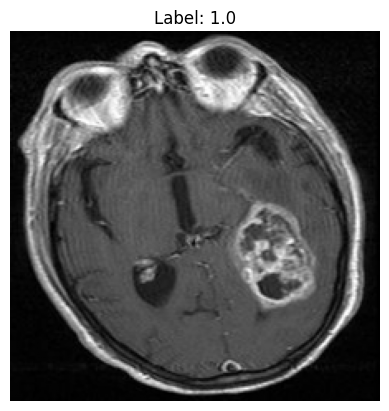

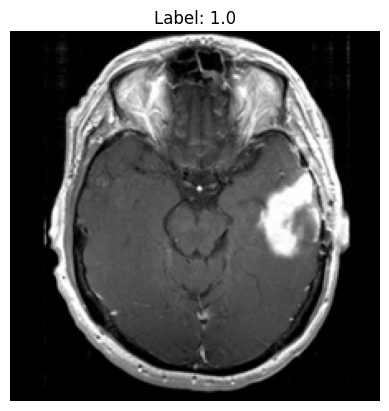

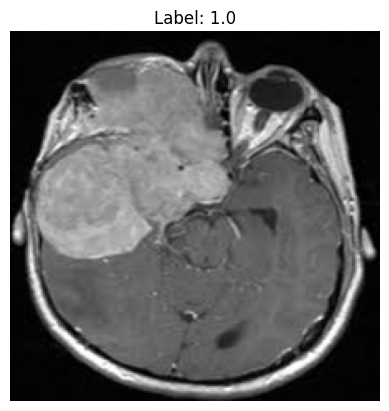

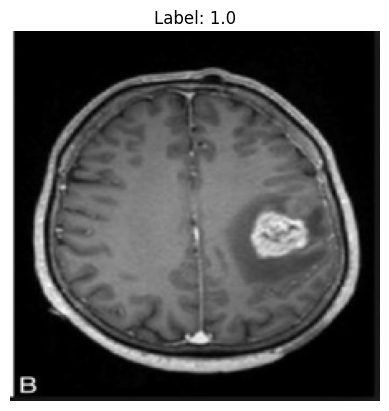

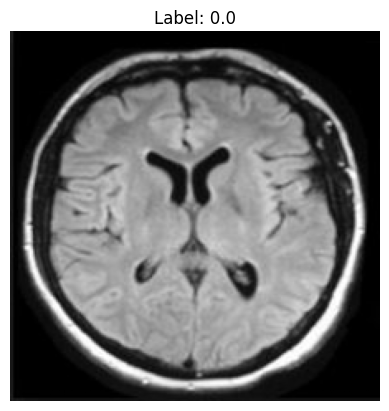

In [22]:
for image, label in train.take(5):
  plt.figure()
  plt.imshow(image.numpy()) # Converting tensor into numpy array
  plt.title('Label: {}'.format(label.numpy()))
  plt.axis('off')
  plt.show()

In [23]:
# Designing validation and training set
validation_size = int(0.1*202) # Take 10% of training for validation set
train = train.skip(validation_size) # traning set will skip the first 10%
val = train.take(validation_size)

In [24]:
# Setting batch size
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

## **Training data**

We will train data with deep learning CNN

In [25]:
# Initiating sequential model
model = Sequential()

# Feature extraction
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='valid')) # 224: our image size 3: RGB
model.add(MaxPooling2D((2, 2))) # MaxPooling probably better for this case than average pooling
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # There are 2 dense, 1: tumor, 0: non-tumor # 'Sigmoid' for binary classification, 'softmax' for multiclass classification

In [26]:
# Model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 394272)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │   100,933,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,935,041 (385.04 MB)

 Trainable params: 100,935,041 (385.04 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compiling model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

We will use 10 epochs for optimizing time and resource for this tutorial

In [28]:
# Training model
history = model.fit(train, validation_data=val, epochs=10, verbose=1)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.4632 - loss: 10.9097 - val_accuracy: 0.3000 - val_loss: 3.2939
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.6242 - loss: 2.1974 - val_accuracy: 0.9500 - val_loss: 0.5878
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.8438 - loss: 0.6598 - val_accuracy: 0.5500 - val_loss: 0.8286
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.7336 - loss: 0.6665 - val_accuracy: 0.9500 - val_loss: 0.3188
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8903 - loss: 0.4123 - val_accuracy: 0.9500 - val_loss: 0.2150
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9279 - loss: 0.2341 - val_accuracy: 0.9500 - val_loss: 0.1538
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9478 - loss: 0.1693 - val_accuracy: 1.0000 - val_loss: 0.0709
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9725 - loss: 0.1066 - val_accuracy: 1.0000 - val_loss: 0.0347
Epoch 9

In [29]:
# Evaluation
evaluation = model.evaluate(test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - accuracy: 0.8041 - loss: 1.0771


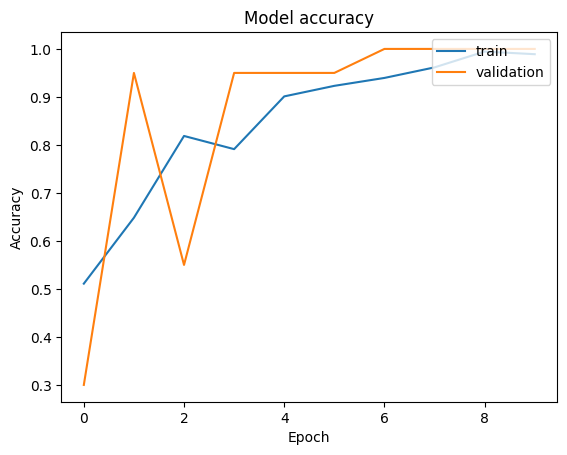

In [30]:
# Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'], loc= 'upper right')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

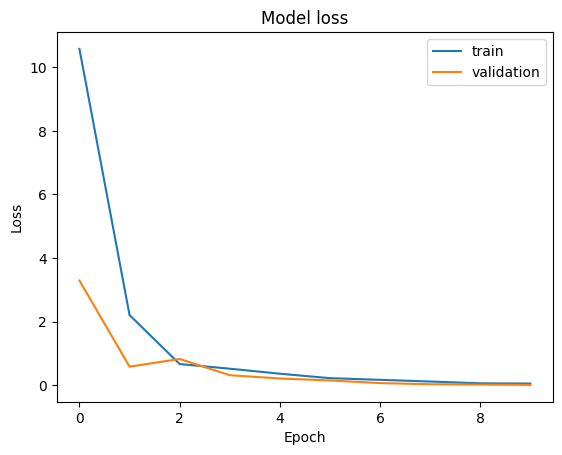

In [31]:
# Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'], loc= 'upper right')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [32]:
# Saving the trained models
model.save('/content/drive/MyDrive/Colab Notebooks/datasets/brain_tumor_dataset/brain_tumor_model.h5')

## **Testing**

In [33]:
def load_uploaded_image(image_bytes):
  img = Image.open(io.BytesIO(image_bytes))
  img = img.resize((224, 224))
  img_array = np.array(img)
  img_array = img_array / 255.0
  return img_array

def predict_image(image_bytes):
  img_array = load_uploaded_image(image_bytes)
  img_array = np.expand_dims(img_array, axis=0)
  prediction = model.predict(img_array)
  if prediction[0][0] > 0.5:
    return "Tumor detected"
  else:
    return "No tumor detected"

Saving Y15.jpg to Y15.jpg


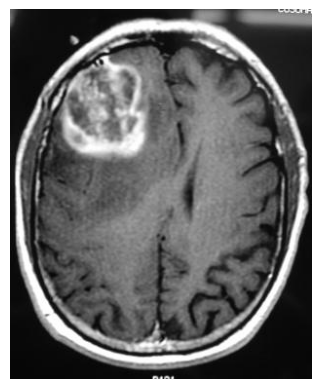

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
Tumor detected


In [34]:
# Uploading data with tumor image and check the result of prediction

# Lets start with the positive tumor image

# Uploading the positive tumor image
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

# Lets confirm the prediction result
result = predict_image(image_bytes=image_bytes)
print(result) # it confirms the result is positive

Saving 24 no.jpg to 24 no.jpg


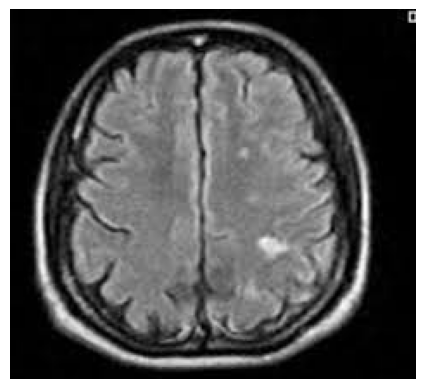

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
No tumor detected


In [35]:
# Lets check the negative tumor image too

# Uploading the negative tumor image
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

# Lets confirm the prediction result
result = predict_image(image_bytes=image_bytes)
print(result) # it confirms the result is negative